#  Climate Analysis
### Jessica Bolz

###  I am concerned about climate change, so I'd like to see if there is a measureable shift in weather patterns in the US as predicted by climate models.  Climate change is an existential crisis that our society has never before faced.  It is a threat to the planet and to human civilization in the near term.  It's important to validate the climate models in order to design resiliancy into response, planning, and preparation for our communities.  I'll be analyzing US tornado, precipitation, and temperature data.  I'll also compare a more densely populated region to a less densely populated region to see if the carbon footprint on the former is greater.

#  Part I: Analysis of Tornado Data for US from 1950 to 2018
##  Data Source:  https://www.spc.noaa.gov/wcm/#data  (bottom of the page is a file called 1950-2018_all_tornadoes.csv

   ## Step 1:  Import libraries, read the file, and get a feel for the data

In [46]:
# Import libraries

import matplotlib.pyplot as plt     
import pandas as pd
import numpy as np
import os 



In [47]:
# Check directory

os.getcwd()

'C:\\Users\\bolzj'

In [48]:


df=pd.read_csv('1950-2018_all_tornadoes.csv')       # Read the tornado data file into python data frame

df.shape                                            # Find out the number of rows/observations and columns/variables



(64825, 29)

In [49]:
df.head()                                          # Display the first five rows

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,9.5,150,2,0,1,0,0,0,0,0
1,1,1950,1,3,1950-01-03,11:00:00,3,MO,29,1,...,6.2,150,2,1,2,189,0,0,0,0
2,1,1950,1,3,1950-01-03,11:10:00,3,IL,17,1,...,3.3,100,2,1,2,119,0,0,0,0
3,2,1950,1,3,1950-01-03,11:55:00,3,IL,17,2,...,3.6,130,1,1,1,135,0,0,0,0
4,3,1950,1,3,1950-01-03,16:00:00,3,OH,39,1,...,0.1,10,1,1,1,161,0,0,0,0


In [50]:
df['st'].mode()                                 # Which state has had the most tornadoes

0    TX
dtype: object

In [51]:
for col in df.columns:                           # Display variable names
    print(col)

om
yr
mo
dy
date
time
tz
st
stf
stn
mag
inj
fat
loss
closs
slat
slon
elat
elon
len
wid
ns
sn
sg
f1
f2
f3
f4
fc


## Step 2:  Modify the dataframe to desired fields

### Important Fields

### After analyzing the documentation that accompany the data file, only the following variables will be kept:

1.  yr:  year
2.  mo:  month
3.  st:  state
4.  mag:  F-scale (tornado intensity rating on 0 to 5 scale, -9 if unknown)
5.  inj:  injuries
6.  fat:  fatalities
7.  loss:  prior to 1996, estimated property loss on a 1 to 9 scale:  
            0/blank= unknown 
            1= less than $50
            2= between $50 and $500
            3= between $500 and $5,000
            4= between $5,000 and $50,000
            5= between $50,000 and $500,000
            6= between $500,000 and $5,000,000
            7= between $5,000,000 and $50,000,000
            8= between $50,000,000 and $500,000,000
            9= $5,000,000,000
            
            from 1996 on, listed in millions of dollars, 0/blank=unknown
8.  closs:  crop loss in millions of dollars
9.  len:  length in miles
10.  wid:  width in yds

In [52]:
tornado_df=pd.read_csv('1950-2018_all_tornadoes.csv', usecols=[              # make a new df with chosen variables only
    'yr','mo','st','mag','inj','fat','loss','closs','len','wid'])
tornado_df.head()

,yr,mo,st,mag,inj,fat,loss,closs,len,wid
0,1950,1,MO,3,3,0,6.0,0.0,9.5,150
1,1950,1,MO,3,3,0,6.0,0.0,6.2,150
2,1950,1,IL,3,0,0,5.0,0.0,3.3,100
3,1950,1,IL,3,3,0,5.0,0.0,3.6,130
4,1950,1,OH,1,1,0,4.0,0.0,0.1,10


## Step 3:  Find the number of tornadoes per decade to see if there is an increase

### 3.1  Make a dataframe for decade and number of tornadoes

In [53]:
# Find the number of tornadoes in each decade using count method   

ct_fif=tornado_df['yr'].loc[tornado_df['yr']<1960].count()
ct_six=tornado_df['yr'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].count()    
ct_sev=tornado_df['yr'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].count()
ct_eig=tornado_df['yr'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].count()
ct_nin=tornado_df['yr'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].count()
ct_nau=tornado_df['yr'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].count()
ct_ten=tornado_df['yr'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].count()


# Make a dictionary connecting counts to decade names

d={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Number of Tornadoes':[
    ct_fif, ct_six, ct_sev, ct_eig, ct_nin, ct_nau, ct_ten]}

# Change the dictionary to a dataframe for analysis

tornado_decade = pd.DataFrame(data=d)
tornado_decade





,Decade,Number of Tornadoes
0,1950s,4905
1,1960s,6938
2,1970s,8711
3,1980s,8312
4,1990s,12276
5,2000s,12970
6,2010s,10713


### 3.2 Visualize the data

<ipython-input-54-c6a80d6eb617>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


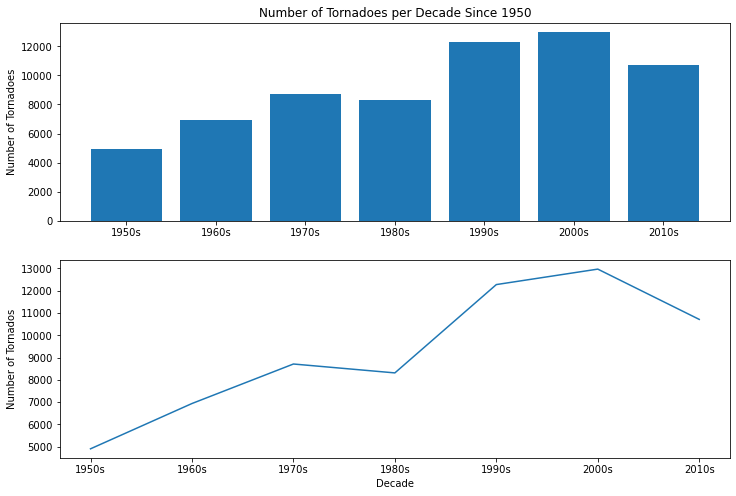

In [54]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(2,1,figsize=(12,8))


# Make a bar plot of the data

ax_list[0].bar(tornado_decade["Decade"], tornado_decade["Number of Tornadoes"])   
ax_list[0].set_title("Number of Tornadoes per Decade Since 1950")
ax_list[0].set_ylabel("Number of Tornadoes")

# Make a line plot of the data

ax_list[1].plot(tornado_decade["Decade"], tornado_decade["Number of Tornadoes"])  
ax_list[1].set_xlabel("Decade")
ax_list[1].set_ylabel("Number of Tornados")

fig.show()


### Observation:  There certainly seems to be an increase in the number of tornadoes since the fifties!  The decrease in 2010s is promising.  If the overall increase is due to carbon emissions, perhaps regulations put in place in the 2000s is making an impact.

## Step 4:  See if there is an increase in the number of injuries and fatalities over time

### 4.1 Make a dataframe for decade and number of injuries and fatalities

In [55]:
# Find the number of injuries and fatalities per decade using the sum method  

inj_fat5=(tornado_df['inj'].loc[tornado_df['yr']<1960].sum(axis=0))+(tornado_df['fat'].loc[tornado_df['yr']<1960].sum(axis=0))
inj_fat6=(tornado_df['inj'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].sum(axis=0))
inj_fat7=(tornado_df['inj'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].sum(axis=0))
inj_fat8=(tornado_df['inj'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].sum(axis=0))
inj_fat9=(tornado_df['inj'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].sum(axis=0))
inj_fat0=(tornado_df['inj'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].sum(axis=0))
inj_fat1=(tornado_df['inj'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].sum(axis=0)) + (tornado_df['fat'].loc[
    (tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].sum(axis=0))


# Make a dictionary connecting injury/fatality sum to decade

d1={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Number of Injuries and Fatalities':[inj_fat5, inj_fat6, inj_fat7, inj_fat8, inj_fat9, inj_fat0, inj_fat1]}


# Change the dictionary to a dataframe for analysis

tornado_injfat_decade = pd.DataFrame(data=d1)
tornado_injfat_decade


,Decade,Number of Injuries and Fatalities
0,1950s,18280
1,1960s,20174
2,1970s,27466
3,1980s,13497
4,1990s,12746
5,2000s,10076
6,2010s,12861


### 4.2 Visualize the data

<ipython-input-56-f5d9d393a17c>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


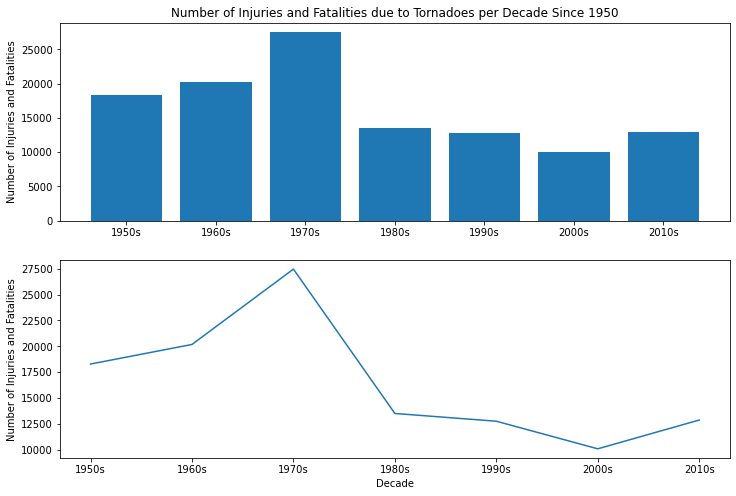

In [56]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(2,1,figsize=(12,8))              


# Make a bar plot of injuries+fatalities

ax_list[0].bar(tornado_injfat_decade["Decade"], tornado_injfat_decade["Number of Injuries and Fatalities"])
ax_list[0].set_title("Number of Injuries and Fatalities due to Tornadoes per Decade Since 1950")
ax_list[0].set_ylabel("Number of Injuries and Fatalities")


# Make a line plot of injuries+fatalities

ax_list[1].plot(tornado_injfat_decade["Decade"], tornado_injfat_decade["Number of Injuries and Fatalities"])
ax_list[1].set_xlabel("Decade")
ax_list[1].set_ylabel("Number of Injuries and Fatalities")

fig.show()

### Observation:  I wasn't expecting to see a decrease!  Perhaps we've gotten better at alerting and preparing for tornadoes.  

## Step 5:  See if there is an increase in the severity of the tornadoes over time

### 5.1 Cleanse the magnitude column
* The dataframe uses -9 if the magnitude (0-5) is not known.  This will affect the average magnitude per decade if left unchanged.

In [61]:
# Replace all -9 magnitudes with NaN so that it won't be included in the average

tornado_df['mag'] = tornado_df['mag'].replace(-9,np.nan)
tornado_df[61453:61455]

,yr,mo,st,mag,inj,fat,loss,closs,len,wid
61453,2016,4,CO,NaN,0,0,0.0,0.0,1.20,100
61454,2016,4,CO,NaN,0,0,0.0,0.0,0.59,100


### 5.2 Make a dataframe for decade and average tornado magnitude (0-5)

In [62]:
# Find the average magnitude per decade using the mean method

mag_fif=tornado_df['mag'].loc[tornado_df['yr']<1960].mean(axis=0)
mag_six=tornado_df['mag'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
mag_sev=tornado_df['mag'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
mag_eig=tornado_df['mag'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
mag_nin=tornado_df['mag'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
mag_nau=tornado_df['mag'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
mag_ten=tornado_df['mag'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)


# Make a dictionary connecting average magnitude of tornado to decade

d2={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Average f-score (magnitude)':[
mag_fif, mag_six, mag_sev, mag_eig, mag_nin, mag_nau, mag_ten]}


# Change the dictionary to a dataframe for analysis

tornado_mag_decade = pd.DataFrame(data=d2)
tornado_mag_decade


,Decade,Average f-score (magnitude)
0,1950s,1.341081
1,1960s,1.219948
2,1970s,1.115142
3,1980s,0.866819
4,1990s,0.576246
5,2000s,0.500386
6,2010s,0.632051


### 5.3 Visualize the data

<ipython-input-90-6be8d2aa26c2>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


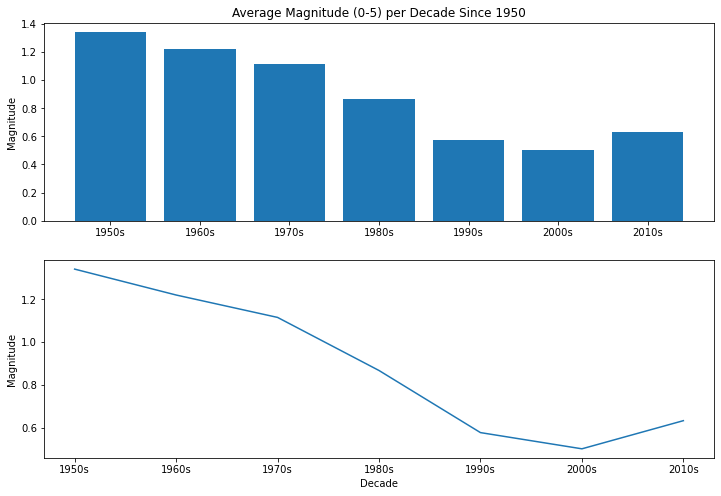

In [90]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(2,1,figsize=(12,8))              


# Make a bar plot of average magnitude

ax_list[0].bar(tornado_mag_decade["Decade"], tornado_mag_decade["Average f-score (magnitude)"])
ax_list[0].set_title("Average Magnitude (0-5) per Decade Since 1950")
ax_list[0].set_ylabel("Magnitude")


# Make a line plot of average magnitude

ax_list[1].plot(tornado_mag_decade["Decade"], tornado_mag_decade["Average f-score (magnitude)"])
ax_list[1].set_xlabel("Decade")
ax_list[1].set_ylabel("Magnitude")

fig.show()

### Observation:  There is generally a decrease in the average magnitude of the tornadoes

## Step 6:  See if there is an increase in the length and width of the storms

### 6.1 Make a dataframe of decade, average length, and average width of tornadoes

In [63]:
# Find the average length of the storms in miles per decade using the mean method

len_fif=tornado_df['len'].loc[tornado_df['yr']<1960].mean(axis=0)
len_six=tornado_df['len'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
len_sev=tornado_df['len'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
len_eig=tornado_df['len'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
len_nin=tornado_df['len'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
len_nau=tornado_df['len'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
len_ten=tornado_df['len'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)

# Find the average width of the storms in miles per decade using the mean method

wid_fif=tornado_df['wid'].loc[tornado_df['yr']<1960].mean(axis=0)
wid_six=tornado_df['wid'].loc[(tornado_df['yr']>=1960)&(tornado_df['yr']<1970)].mean(axis=0)
wid_sev=tornado_df['wid'].loc[(tornado_df['yr']>=1970)&(tornado_df['yr']<1980)].mean(axis=0)
wid_eig=tornado_df['wid'].loc[(tornado_df['yr']>=1980)&(tornado_df['yr']<1990)].mean(axis=0)
wid_nin=tornado_df['wid'].loc[(tornado_df['yr']>=1990)&(tornado_df['yr']<2000)].mean(axis=0)
wid_nau=tornado_df['wid'].loc[(tornado_df['yr']>=2000)&(tornado_df['yr']<2010)].mean(axis=0)
wid_ten=tornado_df['wid'].loc[(tornado_df['yr']>=2010)&(tornado_df['yr']<2020)].mean(axis=0)

# Make a dictionary connecting decade to average length and width of tornadoes

d3={'Decade':['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'], 'Average length in miles':[
len_fif, len_six, len_sev, len_eig, len_nin, len_nau, len_ten],'Average width in miles':[
    wid_fif, wid_six, wid_sev, wid_eig, wid_nin, wid_nau, wid_ten]}

# Change the dictionary to a dataframe for analysis

tornado_size_decade = pd.DataFrame(data=d3)
tornado_size_decade


,Decade,Average length in miles,Average width in miles
0,1950s,6.013721,112.240775
1,1960s,4.430971,85.711300
2,1970s,4.245001,84.632189
3,1980s,3.105570,80.240014
4,1990s,2.618084,85.691838
5,2000s,3.012140,110.390594
6,2010s,3.739469,171.940259


### 6.2 Visualize the data

Text(0, 0.5, 'Miles')

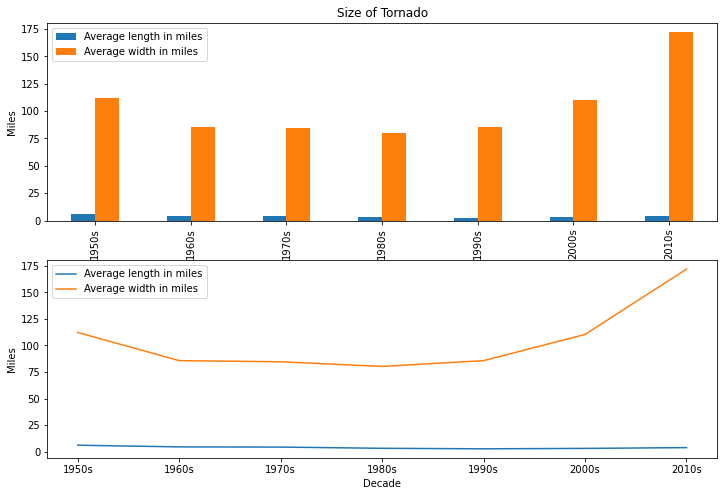

In [123]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(2,1,figsize=(12,8))  


# Make a double bar plot of size

tornado_size_decade.plot.bar("Decade", ax=ax_list[0])
ax_list[0].set_title("Size of Tornado")
ax_list[0].set_ylabel("Miles")

# Make a double line plot of size

tornado_size_decade.plot("Decade", ax=ax_list[1])
ax_list[1].set_ylabel("Miles")



### Observation:  The data isn't compelling but the width of the storm does seem to be increasing

#  Part II:  Analysis of Precipitation and Temperature  for US from 1950 to 2019
## Source: https://www.ncdc.noaa.gov/cag/national/data-info

## Step 1:  Read the files and get a feel for the data

In [93]:
df1=pd.read_csv('110-pcp-12-12-1950-2020.csv')          # Read the precip data file into python data frame
df2=pd.read_csv('110-tavg-12-12-1950-2020.csv')         # Read the average temp data file into python data frame
print(df1.shape)                                        # Find out the number of rows/observations and columns/variables
print(df2.shape)

(74, 3)
(74, 3)


In [117]:
df1.head(10)                                            # Display first 10 rows

,Contiguous U.S.,Precipitation,January-December
0,Units: Inches,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN
2,Missing: -99,NaN,NaN
3,Date,Value,Anomaly
4,195012,30.87,0.93
5,195112,31.25,1.31
6,195212,26.34,-3.60
7,195312,28.31,-1.63
8,195412,26.15,-3.79
9,195512,27.74,-2.20


In [115]:
df1.columns                                             # Display what it thinks are the column names

Index(['Contiguous U.S.', ' Precipitation', ' January-December'], dtype='object')

In [96]:
df2.head(10)                                            # Display first 10 rows

,Contiguous U.S.,Average Temperature,January-December
0,Units: Degrees Fahrenheit,NaN,NaN
1,Base Period: 1901-2000,NaN,NaN
2,Missing: -99,NaN,NaN
3,Date,Value,Anomaly
4,195012,51.39,-0.63
5,195112,51.12,-0.90
6,195212,52.27,0.25
7,195312,53.37,1.35
8,195412,53.33,1.31
9,195512,51.69,-0.33


In [142]:
df2.columns                                             # Display what it thinks are the column names

Index(['Contiguous U.S.', ' Average Temperature', ' January-December'], dtype='object')

## Step 2:  Cleanse the precipitation dataframe

* Eliminate the first few rows, remove last column, rename the first column as year, change year from YYYY12 to YYYY, and change data from strings to floats in order to graph

In [140]:

precip_df=df1[4:]                                                       # Only keep from row 4 on
precip_df.rename(columns={'Contiguous U.S.': 'Year'}, inplace=True)     # Rename the first column as year
precip_df.drop(columns=[' January-December'], inplace=True)             # The last column is not needed


for i in range (4,74):
    precip_df['Year'][i]=float(precip_df['Year'][i][0:4])                   # The year is in YYYYMM format and is a string
    precip_df[' Precipitation'][i]=float(precip_df[' Precipitation'][i])    # The precip is also a string
                                                                            # This loop keeps just YYYY and changes to a float
precip_df.head()                                                            # and changes precip data to a float






,Year,Precipitation
4,1950,30.87
5,1951,31.25
6,1952,26.34
7,1953,28.31
8,1954,26.15


## Step 3:  Visualize the precipitation data

<ipython-input-141-2d6a008adde2>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


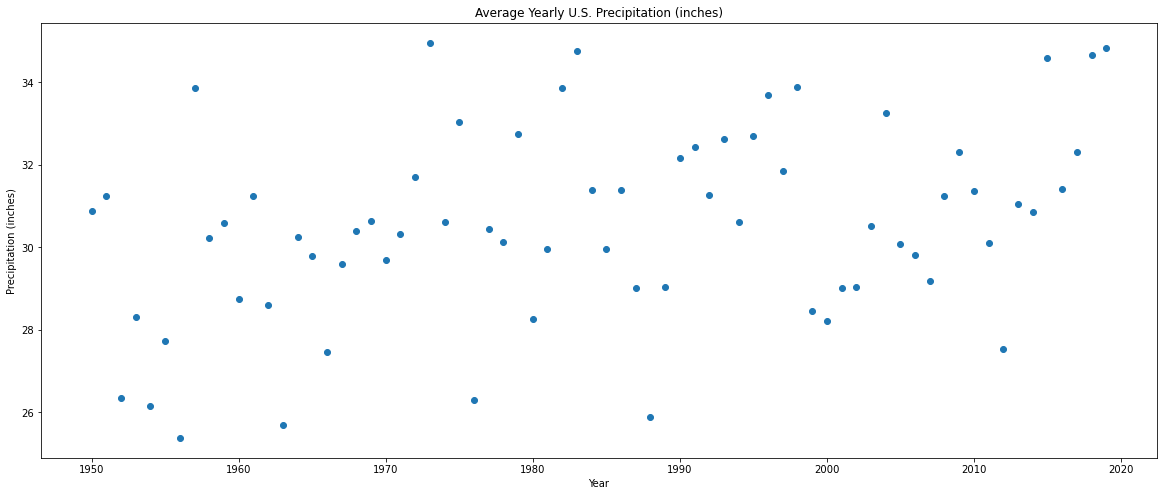

In [141]:
# Make a scatter plot of the precip data

fig, ax_list = plt.subplots(figsize=(20,8))     

ax_list.scatter(precip_df["Year"], precip_df[" Precipitation"])
ax_list.set_title("Average Yearly U.S. Precipitation (inches)")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Precipitation (inches)")

fig.show()

### Observation:  There does appear to be an upward trend in the precipitation

## Step 4:  Cleanse the temperature dataframe

* Eliminate the first few rows, remove last column, rename the first column as year, change year from YYYY12 to YYYY, and change data from strings to floats in order to graph

In [143]:

temp_df=df2[4:]                                                       # Only keep from row 4 on
temp_df.rename(columns={'Contiguous U.S.': 'Year'}, inplace=True)     # Rename the first column as year
temp_df.drop(columns=[' January-December'], inplace=True)             # The last column is not needed


for i in range (4,74):
    temp_df['Year'][i]=float(temp_df['Year'][i][0:4])                             # The year is in YYYYMM format and is a string
    temp_df[' Average Temperature'][i]=float(temp_df[' Average Temperature'][i])  # The temp is also a string
                                                                                  # This loop keeps just YYYY and changes 
temp_df.head()                                                                    # to a float and changes temp data to a 
                                                                                  # float



C:\Users\bolzj\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\bolzj\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\bolzj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns,

,Year,Average Temperature
4,1950,51.39
5,1951,51.12
6,1952,52.27
7,1953,53.37
8,1954,53.33


## Step 5:  Visualize the average temperature data


<ipython-input-144-3fa1ff8ea7f8>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


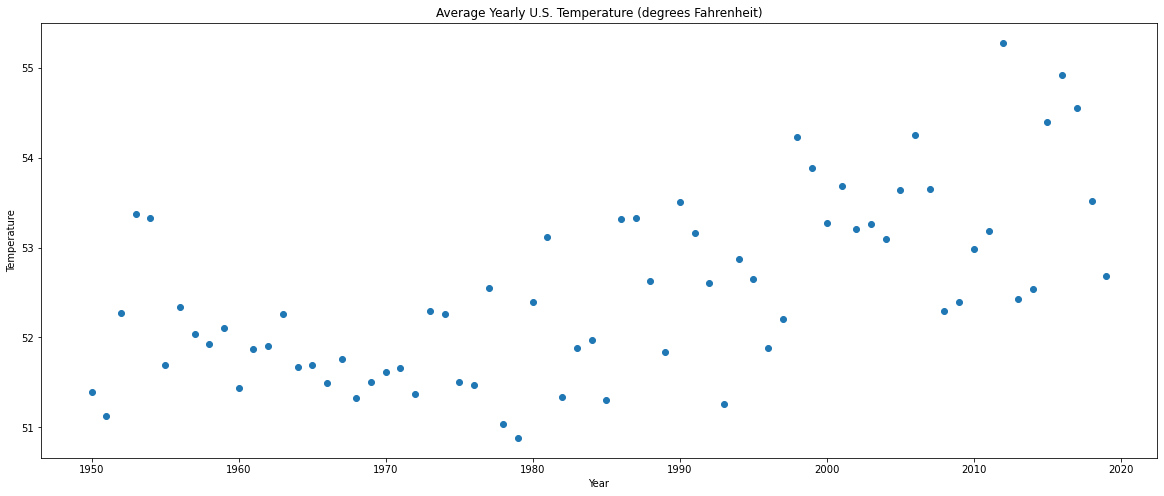

In [144]:
# Make a scatter plot of the temperature data

fig, ax_list = plt.subplots(figsize=(20,8))     

ax_list.scatter(temp_df["Year"], temp_df[" Average Temperature"])
ax_list.set_title("Average Yearly U.S. Temperature (degrees Fahrenheit)")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Temperature")

fig.show()

### Observation:  There does appear to be an upward trend in the precipitation

# Part III:  A Comparison of Regions
## Source:  In order to compare densely vs. non-densely populated areas, I ordered yearly date for Baltimore and Savage River Dam, MD (Western MD) from NOAA.  https://www.ncdc.noaa.gov/cdo-web/confirmation

## Step 1:  Read in, get a feel for the data, and organize 

In [149]:
df3=pd.read_csv('2328476.csv')               # Read the precip and temp data file into python data frame

df3.shape                                    # Find number of rows/observations and columns/variables

(135, 17)

In [150]:
df3.head()                                   # Display first 5 rows

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,596.0,NaN,NaN,8.0,NaN,NaN,1.34,98.0,5615.0,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5710.0,NaN,NaN,NaN,NaN,NaN


In [151]:
df3.tail()                                   # Display last 5 rows

,STATION,NAME,DATE,CDSD,DSND,DSNW,EMNT,EMSD,EMSN,EMXP,EMXT,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN
130,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2016,1512.0,14.0,4.0,8.0,26.0,25.5,2.61,100.0,4060.0,40.55,35.2,57.1,67.2,47.1
131,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2017,1285.0,8.0,2.0,8.0,2.0,2.8,2.58,98.0,3913.0,38.30,7.4,57.4,67.3,47.4
132,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2018,1579.0,7.0,5.0,1.0,4.0,4.7,4.79,99.0,4547.0,71.84,12.8,56.7,65.9,47.5
133,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2019,1716.0,10.0,5.0,5.0,5.0,4.8,1.74,100.0,4375.0,38.15,16.9,58.0,68.0,48.1
134,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3958.0,NaN,NaN,NaN,NaN,NaN


In [152]:
for col in df3.columns: 
    print(col)

STATION
NAME
DATE
CDSD
DSND
DSNW
EMNT
EMSD
EMSN
EMXP
EMXT
HDSD
PRCP
SNOW
TAVG
TMAX
TMIN


## Step 2:  Modify the dataframe 

### 2.1 Only keep desired fields

### Important Fields

### After analyzing the documentation that accompany the data file, only the following variables will be kept:

1.  STATION  
2.  NAME  
3.  DATE:  year
4.  PRCP:  precipitation in ?
5.  SNOW:  snowfall in ?
6.  TAVG:  average temperature for the year
7.  TMIN:  min temp for the year
8.  TMAX:  max temp for the year


In [153]:
# Make new dataframe with desired fields

temp_precip_df=pd.read_csv('2328476.csv', usecols=['STATION','NAME','DATE','PRCP','SNOW','TAVG','TMIN','TMAX'])
temp_precip_df.head()

,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


### 2.2 Rename column

In [154]:
# Change "date" to "year"

temp_precip_df1=temp_precip_df.rename(columns={'DATE':'YEAR'})  
temp_precip_df1.head()


,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


### 2.3 Isolate Baltimore data

In [155]:
# Make a baltimore only df

baltimore_df=temp_precip_df1[64:]                    
baltimore_df.head()

,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
64,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1950,38.51,3.7,55.2,64.0,46.4
65,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1951,45.83,8.6,55.5,65.6,45.4
66,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1952,56.60,14.4,56.0,65.7,46.2
67,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1953,48.27,11.9,57.0,67.4,46.6
68,USW00093721,"BALTIMORE WASHINGTON INTERNATIONAL AIRPORT, MD US",1954,27.91,16.6,55.3,65.6,45.0


## Step 3:  Visualize Baltimore rainfall and temperature data

### 3.1  Plot the temperature data

<ipython-input-175-3ecce77a1ec4>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


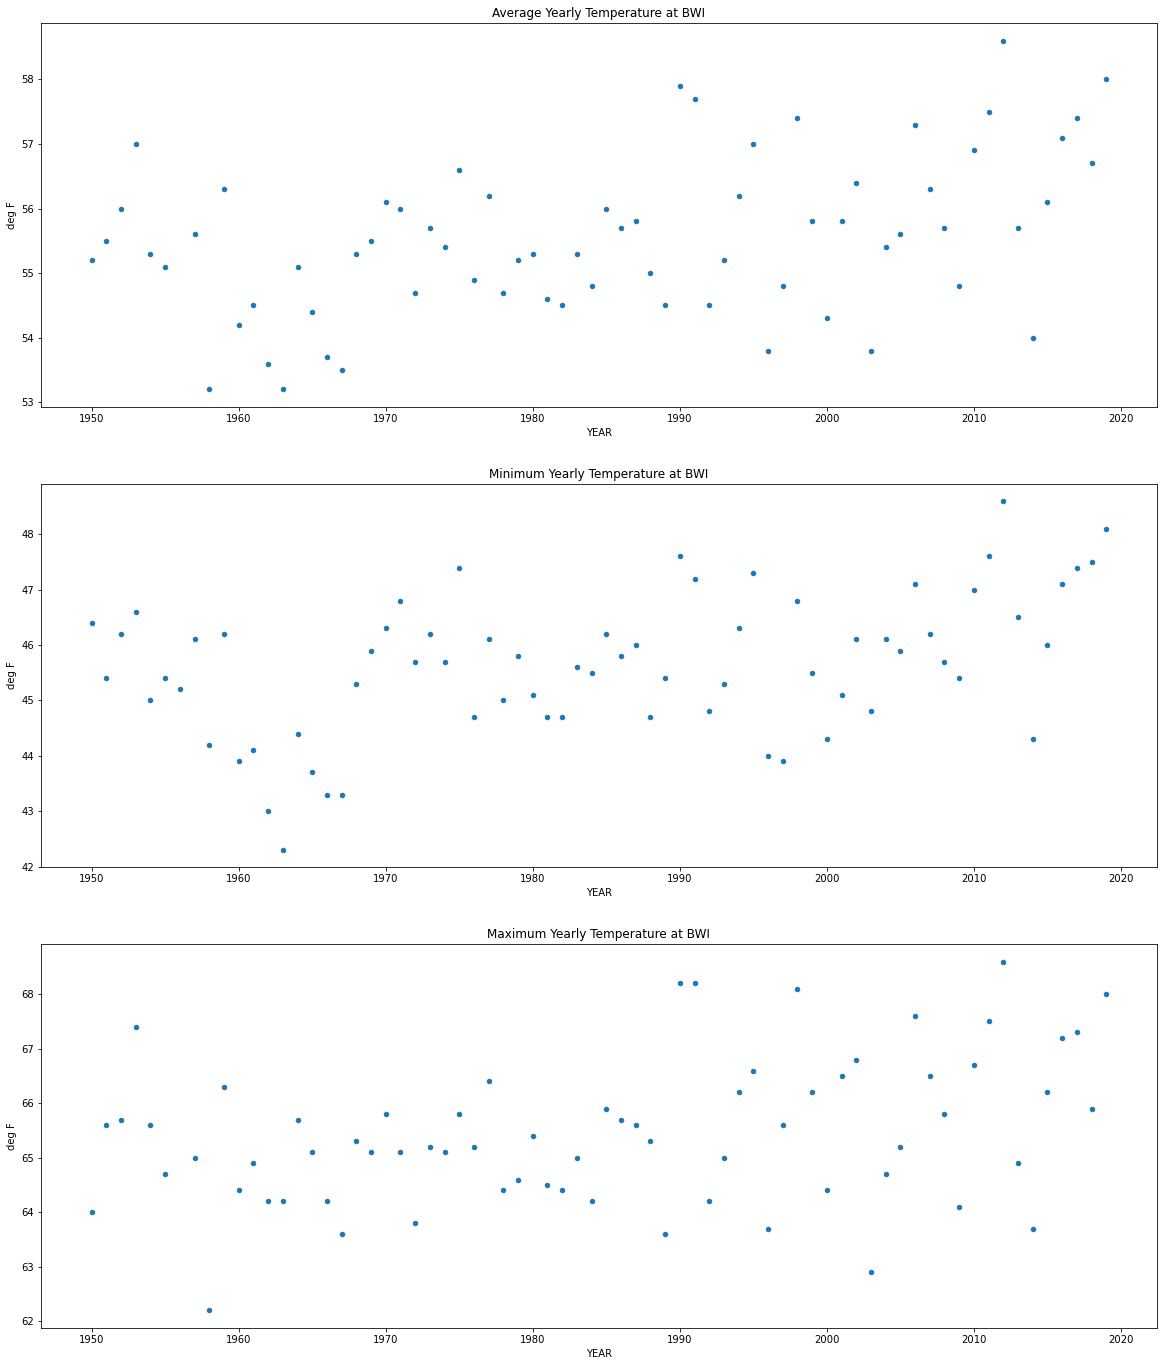

In [175]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(3,1,figsize=(20,24))  


# Make scatter plots for avg, min and max yearly temperature

baltimore_df.plot.scatter('YEAR', 'TAVG', ax=ax_list[0])
ax_list[0].set_title("Average Yearly Temperature at BWI")
ax_list[0].set_ylabel("deg F")

baltimore_df.plot.scatter('YEAR', 'TMIN', ax=ax_list[1])
ax_list[1].set_title("Minimum Yearly Temperature at BWI")
ax_list[1].set_ylabel("deg F")

baltimore_df.plot.scatter('YEAR', 'TMAX', ax=ax_list[2])
ax_list[2].set_title("Maximum Yearly Temperature at BWI")
ax_list[2].set_ylabel("deg F")


fig.show()

### 3.2 Plot the precipitation data

<ipython-input-159-7f5e509315b6>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


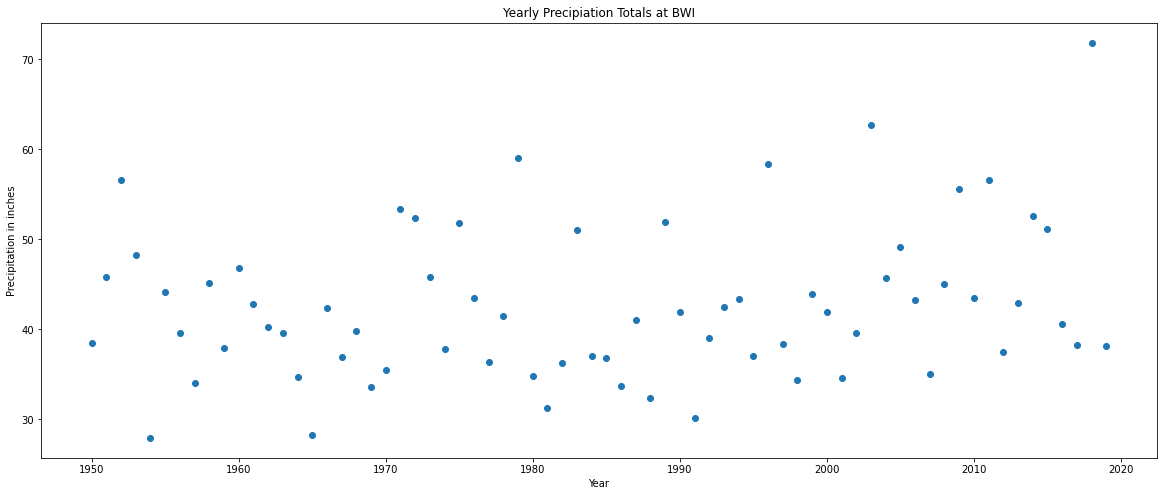

In [159]:
fig, ax_list = plt.subplots(figsize=(20,8))                           # Make a scatter plot of the baltimore precip


ax_list.scatter(baltimore_df["YEAR"], baltimore_df["PRCP"])
ax_list.set_title("Yearly Precipiation Totals at BWI")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Precipitation in inches")

fig.show()

### Observation:  There does seem to be an upward trend for Baltimore's precipitation and temperature data over time.  

## Step 4:  Visualize Western, MD rainfall and temperature data

### 4.1 Isolate Western, MD data 

In [160]:
savage_df=temp_precip_df1[:63]                   # Make a df of just Savage River Dam, MD data
savage_df.head()


,STATION,NAME,YEAR,PRCP,SNOW,TAVG,TMAX,TMIN
0,USC00188065,"SAVAGE RIVER DAM, MD US",1950,38.05,NaN,NaN,NaN,NaN
1,USC00188065,"SAVAGE RIVER DAM, MD US",1951,41.11,NaN,NaN,NaN,NaN
2,USC00188065,"SAVAGE RIVER DAM, MD US",1952,38.73,NaN,NaN,NaN,NaN
3,USC00188065,"SAVAGE RIVER DAM, MD US",1953,31.67,NaN,51.4,63.9,38.9
4,USC00188065,"SAVAGE RIVER DAM, MD US",1954,NaN,NaN,NaN,NaN,NaN


### 4.2 Plot the temperature data

<ipython-input-176-ddb5c9b0e1d6>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


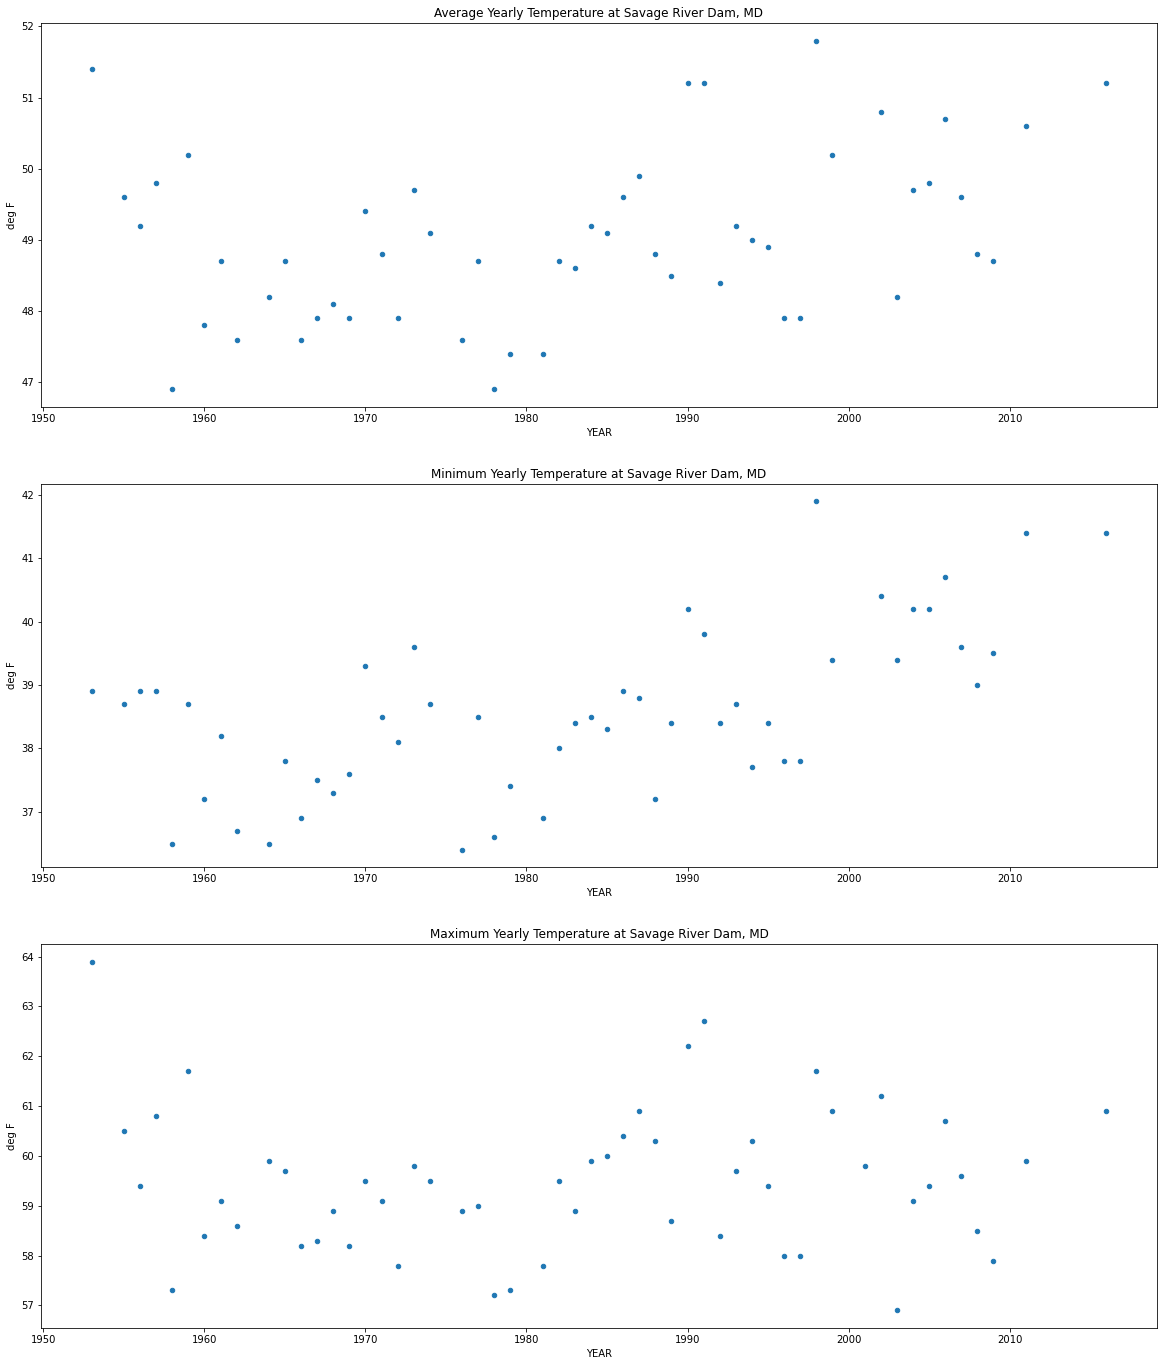

In [176]:
# Set up how plots will be arranged

fig, ax_list = plt.subplots(3,1,figsize=(20,24))  


# Make scatter plots for avg, min and max yearly temperature

savage_df.plot.scatter('YEAR', 'TAVG', ax=ax_list[0])
ax_list[0].set_title("Average Yearly Temperature at Savage River Dam, MD")
ax_list[0].set_ylabel("deg F")

savage_df.plot.scatter('YEAR', 'TMIN', ax=ax_list[1])
ax_list[1].set_title("Minimum Yearly Temperature at Savage River Dam, MD")
ax_list[1].set_ylabel("deg F")

savage_df.plot.scatter('YEAR', 'TMAX', ax=ax_list[2])
ax_list[2].set_title("Maximum Yearly Temperature at Savage River Dam, MD")
ax_list[2].set_ylabel("deg F")


fig.show()



### 4.3 Plot the yearly precipitation data

<ipython-input-164-b6e4b53b0c0e>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


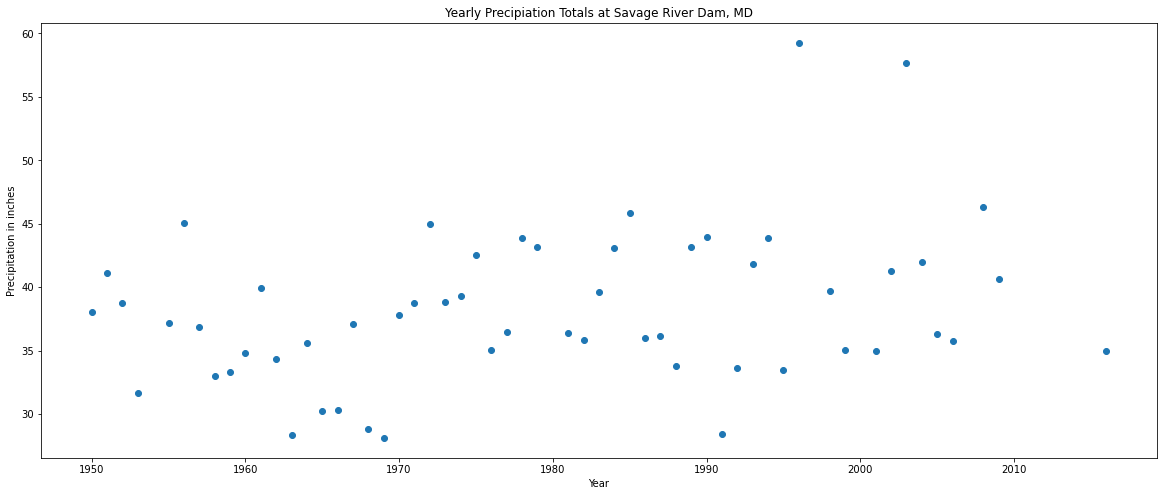

In [164]:
fig, ax_list = plt.subplots(figsize=(20,8))                # Make a scatter plot of the Savage River Dam, MD precip

ax_list.scatter(savage_df["YEAR"], savage_df["PRCP"])
ax_list.set_title("Yearly Precipiation Totals at Savage River Dam, MD")
ax_list.set_xlabel("Year")
ax_list.set_ylabel("Precipitation in inches")

fig.show()

### Observation:  I don't think the upward trend as clear as it is with Baltimore, so maybe population density does play a role. 

## Conclusion: I do believe my analysis verfies climate models.  There is an increase in the number of tornadoes, amount of precipitation, and temperature nationally.  The comparison between a densely and sparsely populated region (with increased precipitation and temperature more apparent in the former) indicates that perhaps this is due to human impact.

# The End